### The goal of this project is find the best players for each NFL team to target in free agency. Utilizing pandas and other libraries, I'll request data from various websites that contain team position statistics, cap availability, and player rankings who are currently available to sign.

In [1]:
# Import libraries for web scraping process

import requests
from bs4 import BeautifulSoup

In [2]:
cap_url = "https://overthecap.com/salary-cap-space"

cap_page = requests.get(cap_url)

cap_soup = BeautifulSoup(cap_page.text, 'html')

In [3]:
print(cap_soup)

<!DOCTYPE html>
<html lang="en-US"><head><link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect"/><script>WebFontConfig={google:{families:["Open Sans","Oswald","Lato&display=swap"]}};if ( typeof WebFont === "object" && typeof WebFont.load === "function" ) { WebFont.load( WebFontConfig ); }</script><script data-optimized="1" src="https://overthecap.com/wp-content/plugins/litespeed-cache/assets/js/webfontloader.min.js"></script> <title>NFL Salary Cap Space | Over The Cap</title><meta content="NFL salary cap space estimates for all 32 teams" name="description"/><meta content="Overthecap.com" name="author"/><meta content="noarchive" name="robots"/><link href="//gmpg.org/xfn/11" rel="profile"/><link href="https://overthecap.com/xmlrpc.php" rel="pingback"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><style type="text/css">.BUF{background-color:#00338D !important;;color:#F40234 !important;}.BUF-reverse{background-color:#F40234 !important;;color:#0033

In [4]:
# extract html where team name exists

cap_soup.find_all('a', class_='team-link')

[<a class="team-link WAS" href="/salary-cap/washington-commanders/">Commanders</a>,
 <a class="team-link NE" href="/salary-cap/new-england-patriots/">Patriots</a>,
 <a class="team-link TEN" href="/salary-cap/tennessee-titans/">Titans</a>,
 <a class="team-link HOU" href="/salary-cap/houston-texans/">Texans</a>,
 <a class="team-link CHI" href="/salary-cap/chicago-bears/">Bears</a>,
 <a class="team-link ARI" href="/salary-cap/arizona-cardinals/">Cardinals</a>,
 <a class="team-link IND" href="/salary-cap/indianapolis-colts/">Colts</a>,
 <a class="team-link CIN" href="/salary-cap/cincinnati-bengals/">Bengals</a>,
 <a class="team-link DET" href="/salary-cap/detroit-lions/">Lions</a>,
 <a class="team-link PHI" href="/salary-cap/philadelphia-eagles/">Eagles</a>,
 <a class="team-link SEA" href="/salary-cap/seattle-seahawks/">Seahawks</a>,
 <a class="team-link LV" href="/salary-cap/las-vegas-raiders/">Raiders</a>,
 <a class="team-link NYG" href="/salary-cap/new-york-giants/">Giants</a>,
 <a clas

In [5]:
# Extract only the text displayed from previous extract

team_cap_link = cap_soup.find_all('a', class_='team-link')

team_cap_names = [columns.text for columns in team_cap_link]

team_cap_names

['Commanders',
 'Patriots',
 'Titans',
 'Texans',
 'Bears',
 'Cardinals',
 'Colts',
 'Bengals',
 'Lions',
 'Eagles',
 'Seahawks',
 'Raiders',
 'Giants',
 'Falcons',
 'Vikings',
 'Broncos',
 'Rams',
 'Jets',
 'Jaguars',
 'Steelers',
 'Buccaneers',
 'Packers',
 'Panthers',
 'Browns',
 'Cowboys',
 'Chiefs',
 'Ravens',
 '49ers',
 'Saints',
 'Bills',
 'Chargers',
 'Dolphins',
 'Patriots',
 'Lions',
 'Cardinals',
 'Colts',
 'Vikings',
 'Titans',
 'Commanders',
 'Steelers',
 'Panthers',
 'Jaguars',
 'Chargers',
 'Bengals',
 'Jets',
 'Texans',
 'Bears',
 'Broncos',
 'Cowboys',
 'Falcons',
 'Giants',
 'Raiders',
 'Packers',
 'Chiefs',
 'Buccaneers',
 'Dolphins',
 'Rams',
 'Seahawks',
 'Ravens',
 'Eagles',
 '49ers',
 'Bills',
 'Browns',
 'Saints',
 'Patriots',
 'Panthers',
 'Commanders',
 'Lions',
 'Seahawks',
 'Vikings',
 'Steelers',
 'Jaguars',
 'Buccaneers',
 'Titans',
 'Colts',
 'Cardinals',
 'Chargers',
 'Falcons',
 'Bengals',
 'Cowboys',
 'Bears',
 'Raiders',
 'Chiefs',
 'Broncos',
 'Texan

In [6]:
# Remove duplicates from list

nfl_teams_list =[]

for team in team_cap_names:
    if team not in nfl_teams_list:
        nfl_teams_list.append(team)
        
nfl_teams_list

['Commanders',
 'Patriots',
 'Titans',
 'Texans',
 'Bears',
 'Cardinals',
 'Colts',
 'Bengals',
 'Lions',
 'Eagles',
 'Seahawks',
 'Raiders',
 'Giants',
 'Falcons',
 'Vikings',
 'Broncos',
 'Rams',
 'Jets',
 'Jaguars',
 'Steelers',
 'Buccaneers',
 'Packers',
 'Panthers',
 'Browns',
 'Cowboys',
 'Chiefs',
 'Ravens',
 '49ers',
 'Saints',
 'Bills',
 'Chargers',
 'Dolphins']

In [7]:
# extract html table headers

headers = cap_soup.find_all('th')

head_text = [columns.text for columns in headers]

cap_head =[]

for head in head_text:
    if head not in cap_head:
        cap_head.append(head)

cap_head

['Team',
 'Cap Space',
 'Effective Cap Space ',
 '#',
 'Active Cap Spending',
 'Dead Money']

In [8]:
# extract html table rows

row_values = cap_soup.find_all('tr') 

for value in row_values:
    row_text = value.find_all('td')
    individual_row_data = [data.text for data in row_text]
    
individual_row_data

['Ravens', '$169,866,000', '$129,876,000', '8', '$144,134,000', '$0']

### Unfortunately, the script pulled all tabs from the web page. We only want the numbers for the upcoming season. The good news is the script to load the row values into a dataframe will error and only load the 2024 cap numbers.

In [9]:
import pandas as pd

In [10]:
# Insert our headers into the new dataframe

cap_df = pd.DataFrame(columns = cap_head)

cap_df

,Team,Cap Space,Effective Cap Space,#,Active Cap Spending,Dead Money


In [11]:
# Insert the row values into the df (set 1 as the starting point)

try:
    for value in row_values[1:]:
        row_text = value.find_all('td')
        individual_row_data = [data.text for data in row_text]
    
# look at length of dataframe with each new iteration and append it with another new row
    
        length = len(cap_df)
        cap_df.loc[length] = individual_row_data
 
except ValueError:
    pass

cap_df

,Team,Cap Space,Effective Cap Space,#,Active Cap Spending,Dead Money
0,Commanders,"$91,542,471","$80,785,768",50,"$150,267,086","$21,933,514"
1,Patriots,"$85,326,475","$76,585,061",58,"$168,389,002","$11,437,300"
2,Titans,"$75,460,344","$69,370,802",52,"$152,462,069","$31,837,754"
3,Texans,"$62,853,997","$59,444,999",55,"$181,826,907","$13,780,652"
4,Bears,"$62,720,457","$50,734,844",56,"$185,972,487","$10,539,071"
5,Cardinals,"$56,632,512","$45,483,159",63,"$198,811,670","$14,151,579"
6,Colts,"$49,208,378","$45,003,148",64,"$202,264,141","$8,360,289"
7,Bengals,"$48,551,440","$44,722,095",51,"$214,181,359","$1,775,689"
8,Lions,"$45,278,103","$42,236,693",54,"$188,833,754","$23,054,507"
9,Eagles,"$42,959,107","$38,882,464",63,"$199,982,617","$16,384,435"


In [16]:
# Now, let's drop the unwanted columns and reset our index to the Team name

salary_cap = cap_df[['Team','Cap Space']].set_index('Team')

salary_cap

,Cap Space
Team,
Commanders,"$91,542,471"
Patriots,"$85,326,475"
Titans,"$75,460,344"
Texans,"$62,853,997"
Bears,"$62,720,457"
Cardinals,"$56,632,512"
Colts,"$49,208,378"
Bengals,"$48,551,440"
Lions,"$45,278,103"


In [17]:
salary_cap.dtypes

Cap Space    object
dtype: object

In [18]:
# Remove extra characters to change data type to float

salary_cap['Cap Space'] = salary_cap['Cap Space'].str.replace('$','')
salary_cap['Cap Space'] = salary_cap['Cap Space'].str.replace(',','')
salary_cap['Cap Space'] = salary_cap['Cap Space'].str.replace('(','-')
salary_cap['Cap Space'] = salary_cap['Cap Space'].str.replace(')','')

In [19]:
salary_cap['Cap Space'].astype('float')

Team
Commanders    91542471.0
Patriots      85326475.0
Titans        75460344.0
Texans        62853997.0
Bears         62720457.0
Cardinals     56632512.0
Colts         49208378.0
Bengals       48551440.0
Lions         45278103.0
Eagles        42959107.0
Seahawks      42057651.0
Raiders       41605109.0
Giants        38288933.0
Falcons       37267401.0
Vikings       37116005.0
Broncos       30575445.0
Rams          29001829.0
Jets          20705353.0
Jaguars       20179124.0
Steelers      18413646.0
Buccaneers    14798670.0
Packers       13628514.0
Panthers      11911547.0
Browns         4957511.0
Cowboys        2243253.0
Chiefs         1257361.0
Ravens         -180381.0
49ers          -285281.0
Saints       -10912634.0
Bills        -14879047.0
Chargers     -21144997.0
Dolphins     -23062846.0
Name: Cap Space, dtype: float64

In [21]:
# Save dataframe to csv

salary_cap.to_csv(r'C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\salary_cap.csv')

## Scraping data on real-time team stats - Offense and Defense

In [22]:
team_of_stats = "https://sports.yahoo.com/nfl/stats/team/?amp;guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&amp;guce_referrer_sig=AQAAABNdA2KI4ZlzkMPEpxHOpSdk5fT6sadCOKTQJztzdT-7f34j3WqRgn_ekaxAeTRNi70tcJr-XS8RfmU5mvi7D8yB4CfxR5Ux5DK7KqjOjel2wfWWlwDr6ONia6_wiSwLANhQ-yeN226GmPvWhfglTV0304m3D79hGzaSxzbXh0xr&amp;selectedTable=0&guccounter=2&selectedTable=0"

off_page = requests.get(team_of_stats)

off_soup = BeautifulSoup(off_page.text, 'html')

off_soup.find_all('table')

[<table class="table graph-table W(100%) Ta(start) Bdcl(c) Mb(56px) Ov(h)"><thead><tr class="Lh(2)" style="background-color:#000"><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) Ta(start) C(th-font-color) Fw(n) Fz(th-font-size) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a C(inverse-text)! Fw(700)!" title="Team">Team</th><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) C(th-font-color) Fw(n) Fz(th-font-size) Ta(end) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a Cur(p) C(inverse-text)! Fw(700)!" title="Games">G</th><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) C(th-font-color) Fw(n) Fz(th-font-size) Ta(end) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a Cur(p) Whs(nw) Bgc(table-header-sorted) C(inverse-text)! Fw(700)!" title="Points per

In [37]:
# extract html table headers

off_head = off_soup.find_all('th')

off_head_text = [columns.text for columns in off_head]

off_headers =[]

for head in off_head_text:
    if head not in off_headers:
        off_headers.append(head)

off_headers

['Team',
 'G',
 'Pts/G',
 'Yds/G',
 'PasY/G',
 'RusY/G',
 '1stD/G',
 '3rdM',
 '3rdD%',
 '4thM',
 '4thD%',
 'PEN',
 'PYds',
 'ToP/G']

In [38]:
# extract html table rows

row_stats = off_soup.find_all('tr') 

for value in row_stats:
    stat_text = value.find_all('td')
    off_row_stats = [data.text for data in stat_text]
    
off_row_stats

['Houston',
 '17',
 '-',
 '342.4',
 '245.5',
 '96.9',
 '19.4',
 '88',
 '37.9',
 '8',
 '38.1',
 '114',
 '937',
 '29:46']

In [39]:
# Insert Offensive headers into a new dataframe

off_df = pd.DataFrame(columns = off_headers)

off_df

,Team,G,Pts/G,Yds/G,PasY/G,RusY/G,1stD/G,3rdM,3rdD%,4thM,4thD%,PEN,PYds,ToP/G


In [40]:
# Insert the row values into the df (set 1 as the starting point)

try:
    for value in row_stats[1:]:
        stat_text = value.find_all('td')
        off_row_stats = [data.text for data in stat_text]
    
# look at length of dataframe with each new iteration and append it with another new row
    
        length = len(off_df)
        off_df.loc[length] = off_row_stats
 
except ValueError:
    pass

off_df

,Team,G,Pts/G,Yds/G,PasY/G,RusY/G,1stD/G,3rdM,3rdD%,4thM,4thD%,PEN,PYds,ToP/G
0,Atlanta,17,-,334.3,207.3,127.0,19.2,90,40.0,8,42.1,84,743,29:09
1,Buffalo,17,-,374.5,244.4,130.1,22.4,109,49.8,9,56.3,106,883,32:02
2,Chicago,17,-,323.2,182.1,141.1,18.9,98,41.2,13,50.0,99,853,31:58
3,Cincinnati,17,-,318.9,229.1,89.8,19.4,82,37.6,9,45.0,76,614,30:57
4,Cleveland,17,-,335.9,217.2,118.6,19.1,80,31.6,18,56.3,115,897,32:19
5,Dallas,17,-,371.6,258.6,112.9,22.6,111,48.3,13,56.5,115,964,31:48
6,Denver,17,-,298.4,191.9,106.5,17.7,81,36.8,13,65.0,99,749,29:31
7,Detroit,17,-,394.8,258.9,135.9,22.1,93,41.5,21,52.5,97,843,31:22
8,Green Bay,17,-,345.5,233.4,112.1,19.9,105,47.1,12,50.0,105,856,29:43
9,Tennessee,17,-,289.0,180.4,108.6,17.5,71,33.5,11,55.0,110,882,29:52


In [44]:
# Save dataframe to csv

off_df.to_csv(r'C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\off_stats.csv')

In [45]:
# Now we do the same for defensive stats

team_def_stats = "https://sports.yahoo.com/nfl/stats/team/?amp;guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&amp;guce_referrer_sig=AQAAABNdA2KI4ZlzkMPEpxHOpSdk5fT6sadCOKTQJztzdT-7f34j3WqRgn_ekaxAeTRNi70tcJr-XS8RfmU5mvi7D8yB4CfxR5Ux5DK7KqjOjel2wfWWlwDr6ONia6_wiSwLANhQ-yeN226GmPvWhfglTV0304m3D79hGzaSxzbXh0xr&amp;selectedTable=0&guccounter=2&selectedTable=1"

def_page = requests.get(team_def_stats)

def_soup = BeautifulSoup(def_page.text, 'html')

def_soup.find_all('table')

[<table class="table graph-table W(100%) Ta(start) Bdcl(c) Mb(56px) Ov(h)"><thead><tr class="Lh(2)" style="background-color:#000"><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) Ta(start) C(th-font-color) Fw(n) Fz(th-font-size) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a C(inverse-text)! Fw(700)!" title="Team">Team</th><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) C(th-font-color) Fw(n) Fz(th-font-size) Ta(end) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a Cur(p) C(inverse-text)! Fw(700)!" title="Games">G</th><th class="Px(cell-padding-x) Py(cell-padding-y) Va(m) C(th-font-color) Fw(n) Fz(th-font-size) Ta(end) Pos(r) Cnt(cq):h::a Pos(a):h::a Bgc(table-hover):h::a Start(0):h::a T(-5000px):h::a H(10000px):h::a W(100%):h::a Z(-1):h::a Cur(p) Whs(nw) Bgc(table-header-sorted) C(inverse-text)! Fw(700)!" title="Points All

In [46]:
# extract html table headers

def_head = def_soup.find_all('th')

def_head_text = [columns.text for columns in def_head]

def_headers =[]

for head in def_head_text:
    if head not in def_headers:
        def_headers.append(head)

def_headers

['Team',
 'G',
 'Pts/G',
 'Yds/G',
 'RushYds/G',
 'PassYds/G',
 'Int',
 'IntTD',
 'FF',
 'DefTD',
 'Total',
 'PD',
 'Sack']

In [63]:
# extract html table rows

def_row_stats = def_soup.find_all('tr') 

for value in def_row_stats:
    def_stat_text = value.find_all('td')
    def_row_stats = [data.text for data in def_stat_text]
    
def_row_stats

['Washington',
 '17',
 '30.5',
 '388.9',
 '126.8',
 '262.2',
 '8',
 '-',
 '-',
 '0',
 '-',
 '-',
 '39']

In [48]:
# Insert Defensive headers into a new dataframe

def_df = pd.DataFrame(columns = def_headers)

def_df

,Team,G,Pts/G,Yds/G,RushYds/G,PassYds/G,Int,IntTD,FF,DefTD,Total,PD,Sack


In [70]:
# Insert the row values into the df (set 1 as the starting point)

def_row_stats = def_soup.find_all('tr')

try:
    for value in def_row_stats[1:]:
        def_stat_text = value.find_all('td')
        def_row_stats = [data.text for data in def_stat_text]
    
# look at length of dataframe with each new iteration and append it with another new row
    
        length = len(def_df)
        def_df.loc[length] = def_row_stats
 
except ValueError:
    pass

def_df

,Team,G,Pts/G,Yds/G,RushYds/G,PassYds/G,Int,IntTD,FF,DefTD,Total,PD,Sack
0,Baltimore,17,16.5,301.4,109.4,191.9,18,-,-,1,-,-,60
1,Kansas City,17,17.3,289.8,113.2,176.5,8,-,-,2,-,-,57
2,San Francisco,17,17.5,303.9,89.7,214.2,22,-,-,1,-,-,48
3,Buffalo,17,18.3,307.2,110.6,196.6,18,-,-,2,-,-,54
4,Dallas,17,18.5,299.7,112.4,187.4,17,-,-,7,-,-,46
5,Tampa Bay,17,19.1,344.2,95.3,248.9,13,-,-,1,-,-,48
6,Pittsburgh,17,19.1,342.1,115.1,227.1,16,-,-,2,-,-,47
7,New Orleans,17,19.2,327.2,119.9,207.3,18,-,-,2,-,-,34
8,Las Vegas,17,19.5,330.9,118.5,212.4,13,-,-,5,-,-,46
9,Green Bay,17,20.6,335.1,128.3,206.8,7,-,-,2,-,-,45


In [72]:
# Save Defensive stats to csv

def_df.to_csv(r'C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\def_stats.csv')

In [60]:
import pandas as pd

avail_fa = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\Available Free Agent Ranking.csv")
avail_fa

,Rank,Player,Position
0,1,Chris Jones,DI
1,2,Kirk Cousins,QB
2,3,Christian Wilkins,DI
3,4,Danielle Hunter,ED
4,5,Mike Evans,WR
...,...,...,...
236,237,Ryan Neal,S
237,238,Ashtyn Davis,S
238,239,Jordan Poyer,S
239,240,Bryan Mone,DI


In [61]:
salary = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\salary_cap.csv")

In [62]:
defense = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\def_stats.csv")

In [63]:
offense = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\NFL Free Agency Project\off_stats.csv")

In [64]:
# Which positions are listed in dataframe?

avail_fa['Position'].unique()

array(['DI', 'QB', 'ED', 'WR', 'T', 'CB', 'LB', 'S', 'G', 'HB', 'TE', 'C'],
      dtype=object)

In [65]:
# Add offense or defense label to dataframe

import numpy as np

dpos = np.array(['DI','ED','CB','LB','S'])

pos_values = np.where(avail_fa['Position'].isin(dpos),'Defense','Offense')

avail_fa['Type'] = pos_values

In [66]:
avail_fa

,Rank,Player,Position,Type
0,1,Chris Jones,DI,Defense
1,2,Kirk Cousins,QB,Offense
2,3,Christian Wilkins,DI,Defense
3,4,Danielle Hunter,ED,Defense
4,5,Mike Evans,WR,Offense
...,...,...,...,...
236,237,Ryan Neal,S,Defense
237,238,Ashtyn Davis,S,Defense
238,239,Jordan Poyer,S,Defense
239,240,Bryan Mone,DI,Defense


In [67]:
# Exploring defensive team standings to find worst ranked Teams
# Tieing positions DI, ED, and LB to Rush Yds/G (Rushing yards allowed per game) and Sacks
# Tieing positions CB and S to Pass Yds/G (Passing yards allowed per game) and Int (Interceptions made)
# Including Pts/G (Points allowed per game) to each position

defense

,Team,G,Pts/G,Yds/G,RushYds/G,PassYds/G,Int,IntTD,FF,DefTD,Total,PD,Sack
0,Baltimore,17,16.5,301.4,109.4,191.9,18,-,-,1,-,-,60
1,Kansas City,17,17.3,289.8,113.2,176.5,8,-,-,2,-,-,57
2,San Francisco,17,17.5,303.9,89.7,214.2,22,-,-,1,-,-,48
3,Buffalo,17,18.3,307.2,110.6,196.6,18,-,-,2,-,-,54
4,Dallas,17,18.5,299.7,112.4,187.4,17,-,-,7,-,-,46
5,Tampa Bay,17,19.1,344.2,95.3,248.9,13,-,-,1,-,-,48
6,Pittsburgh,17,19.1,342.1,115.1,227.1,16,-,-,2,-,-,47
7,New Orleans,17,19.2,327.2,119.9,207.3,18,-,-,2,-,-,34
8,Las Vegas,17,19.5,330.9,118.5,212.4,13,-,-,5,-,-,46
9,Green Bay,17,20.6,335.1,128.3,206.8,7,-,-,2,-,-,45


In [68]:
defense[['Team','RushYds/G']].sort_values(by = 'RushYds/G', ascending = False)[:10]

,Team,RushYds/G
30,Arizona,143.2
24,Seattle,138.4
26,Denver,137.1
25,NY Giants,132.4
9,Green Bay,128.3
31,Washington,126.8
20,Cincinnati,126.2
11,NY Jets,124.0
27,Indianapolis,123.8
28,Carolina,122.4


In [69]:
defense[['Team','Sack']].sort_values(by = 'Sack', ascending = True)[:10]

,Team,Sack
28,Carolina,27
19,Chicago,30
30,Arizona,33
25,NY Giants,34
7,New Orleans,34
14,New England,36
31,Washington,39
16,Jacksonville,40
22,Detroit,41
18,LA Rams,41


In [70]:
defense[['Team','Pts/G']].sort_values(by = 'Pts/G', ascending = False)[:10]

,Team,Pts/G
31,Washington,30.5
30,Arizona,26.8
29,Philadelphia,25.2
28,Carolina,24.5
27,Indianapolis,24.4
26,Denver,24.3
25,NY Giants,23.9
24,Seattle,23.6
23,LA Chargers,23.4
22,Detroit,23.2


In [71]:
defense[['Team','PassYds/G']].sort_values(by = 'PassYds/G', ascending = False)[:10]

,Team,PassYds/G
31,Washington,262.2
29,Philadelphia,252.7
23,LA Chargers,249.8
5,Tampa Bay,248.9
20,Cincinnati,248.4
22,Detroit,247.4
16,Jacksonville,239.8
19,Chicago,237.8
13,Minnesota,234.5
10,Houston,234.1


In [72]:
defense[['Team','Int']].sort_values(by = 'Int', ascending = True)[:10]

,Team,Int
15,Tennessee,6
9,Green Bay,7
28,Carolina,8
17,Atlanta,8
31,Washington,8
1,Kansas City,8
29,Philadelphia,9
23,LA Chargers,9
18,LA Rams,10
14,New England,10


In [73]:
# Worst 10 teams subsets for each metric

top_rushing_allowed = defense[['Team','RushYds/G']].sort_values(by = 'RushYds/G', ascending = False)[:10]
top_sacks_made = defense[['Team','Sack']].sort_values(by = 'Sack', ascending = True)[:10]
top_points_allowed = defense[['Team','Pts/G']].sort_values(by = 'Pts/G', ascending = False)[:10]
top_passing_allowed = defense[['Team','PassYds/G']].sort_values(by = 'PassYds/G', ascending = False)[:10]
top_int_made = defense[['Team','Int']].sort_values(by = 'Int', ascending = True)[:10]

In [74]:
# Identify teams with worst defensive metrics affecting Defensive line and linebackers

from functools import reduce

worst_def_front_stats = [top_rushing_allowed, top_sacks_made, top_points_allowed]

worst_def_front = reduce(lambda left, right: pd.merge(left,right, on='Team', how = 'inner'), worst_def_front_stats)

In [75]:
worst_def_front

,Team,RushYds/G,Sack,Pts/G
0,Arizona,143.2,33,26.8
1,NY Giants,132.4,34,23.9
2,Washington,126.8,39,30.5
3,Carolina,122.4,27,24.5


In [76]:
# Identify teams with worst defensive metrics affecting cornerbacks and safeties

worst_def_back_stats = [top_passing_allowed, top_int_made, top_points_allowed]

worst_def_back = reduce(lambda left, right: pd.merge(left,right, on='Team', how = 'inner'), worst_def_back_stats)

worst_def_back

,Team,PassYds/G,Int,Pts/G
0,Washington,262.2,8,30.5
1,Philadelphia,252.7,9,25.2
2,LA Chargers,249.8,9,23.4


In [77]:
offense

,Team,G,Pts/G,Yds/G,PasY/G,RusY/G,1stD/G,3rdM,3rdD%,4thM,4thD%,PEN,PYds,ToP/G
0,Atlanta,17,-,334.3,207.3,127.0,19.2,90,40.0,8,42.1,84,743,29:09
1,Buffalo,17,-,374.5,244.4,130.1,22.4,109,49.8,9,56.3,106,883,32:02
2,Chicago,17,-,323.2,182.1,141.1,18.9,98,41.2,13,50.0,99,853,31:58
3,Cincinnati,17,-,318.9,229.1,89.8,19.4,82,37.6,9,45.0,76,614,30:57
4,Cleveland,17,-,335.9,217.2,118.6,19.1,80,31.6,18,56.3,115,897,32:19
5,Dallas,17,-,371.6,258.6,112.9,22.6,111,48.3,13,56.5,115,964,31:48
6,Denver,17,-,298.4,191.9,106.5,17.7,81,36.8,13,65.0,99,749,29:31
7,Detroit,17,-,394.8,258.9,135.9,22.1,93,41.5,21,52.5,97,843,31:22
8,Green Bay,17,-,345.5,233.4,112.1,19.9,105,47.1,12,50.0,105,856,29:43
9,Tennessee,17,-,289.0,180.4,108.6,17.5,71,33.5,11,55.0,110,882,29:52


In [78]:
# Finding worst teams of offensive metrics
# Tieing Rushing related columns to T, G, C, and HB - Tie passing related columns to QB, WR, and TE
# Will include Yds/G (Yards per game), ToP/G (Time of possession) and 3rdD% (3rd down conversion percentage) to all

top_rushing_yards = offense[['Team','RusY/G']].sort_values(by = 'RusY/G', ascending = True)[:10]
top_yards_gained = offense[['Team','Yds/G']].sort_values(by = 'Yds/G', ascending = True)[:10]
top_third_down_perc = offense[['Team','3rdD%']].sort_values(by = '3rdD%', ascending = True)[:10]
top_passing_yards = offense[['Team','PasY/G']].sort_values(by = 'PasY/G', ascending = True)[:10]
top_time = offense[['Team','ToP/G']].sort_values(by = 'ToP/G', ascending = True)[:10]

In [79]:
# Identify teams with worst offensive metrics affecting offensive line and running backs/half backs

worst_off_run_stats = [top_rushing_yards, top_yards_gained, top_third_down_perc, top_time]

worst_off_run = reduce(lambda left, right: pd.merge(left,right, on='Team', how = 'inner'), worst_off_run_stats)

In [80]:
worst_off_run

,Team,RusY/G,Yds/G,3rdD%,ToP/G
0,Las Vegas,90.7,289.5,35.6,28:34
1,New England,95.7,276.2,30.2,28:03
2,NY Jets,96.9,268.6,26.0,29:09


In [81]:
# Identify teams with worst offensive metrics affecting QBs, Wide Receivers, and Tight Ends

worst_off_pass_stats = [top_passing_yards, top_yards_gained, top_third_down_perc, top_time]

worst_off_pass = reduce(lambda left, right: pd.merge(left,right, on='Team', how = 'inner'), worst_off_pass_stats)

worst_off_pass

,Team,PasY/G,Yds/G,3rdD%,ToP/G
0,NY Jets,171.7,268.6,26.0,29:09
1,New England,180.5,276.2,30.2,28:03
2,Las Vegas,198.8,289.5,35.6,28:34


In [82]:
# Add 'Defense' and 'Offense' values to newly created subset dataframes

worst_def_front['Type'] = 'Defense'
worst_def_back['Type'] = 'Defense'
worst_off_run['Type'] = 'Offense'
worst_off_pass['Type'] = 'Offense'

In [83]:
worst_def_front

,Team,RushYds/G,Sack,Pts/G,Type
0,Arizona,143.2,33,26.8,Defense
1,NY Giants,132.4,34,23.9,Defense
2,Washington,126.8,39,30.5,Defense
3,Carolina,122.4,27,24.5,Defense


In [26]:
def_back_avail_fa

,Rank,Player,Position,Type
6,7,Kendall Fuller,CB,Defense
12,13,Kamren Curl,S,Defense
17,18,Chidobe Awuzie,CB,Defense
24,25,Stephon Gilmore,CB,Defense
26,27,Steven Nelson,CB,Defense
32,33,Kenny Moore II,CB,Defense
34,35,Xavier McKinney,S,Defense
43,44,Geno Stone,S,Defense
57,58,Julian Blackmon,S,Defense
70,71,Jordan Fuller,S,Defense


In [84]:
# Team names (index axis) don't match. Adjusting values in the Salary Cap df to match others

salary['Team'].replace({'Cardinals':'Arizona', 'Giants':'NY Giants', 'Commanders':'Washington', 
                     'Panthers':'Carolina', 'Eagles':'Philadelphia', 'Chargers':'LA Chargers',
                    'Jets':'NY Jets', 'Patriots':'New England','Raiders':'Las Vegas'}, inplace=True)


In [85]:
salary

,Team,Cap Space
0,Washington,91542471
1,New England,85326475
2,Titans,75460344
3,Texans,62853997
4,Bears,62720457
5,Arizona,56632512
6,Colts,49208378
7,Bengals,48551440
8,Lions,45278103
9,Philadelphia,42959107


In [86]:
# Add Cap Space to newly created subset of dataframes

worst_def_front = pd.merge(worst_def_front, salary, on='Team', how='left')
worst_def_back = pd.merge(worst_def_back, salary, on='Team', how='left')
worst_off_run = pd.merge(worst_off_run, salary, on='Team', how='left')
worst_off_pass = pd.merge(worst_off_pass, salary, on='Team', how='left')

In [87]:
worst_off_pass

,Team,PasY/G,Yds/G,3rdD%,ToP/G,Type,Cap Space
0,NY Jets,171.7,268.6,26.0,29:09,Offense,20705353
1,New England,180.5,276.2,30.2,28:03,Offense,85326475
2,Las Vegas,198.8,289.5,35.6,28:34,Offense,41605109


In [116]:
# Change dtype of Team name to run correlations

corr_off_pass = worst_off_pass
corr_off_pass['Team'] = corr_off_pass['Team'].astype('category').cat.codes


In [117]:
corr_off_pass

,Team,PasY/G,Yds/G,3rdD%,ToP/G,Type,Cap Space
0,1,171.7,268.6,26.0,29:09,Offense,20705353
1,2,180.5,276.2,30.2,28:03,Offense,85326475
2,0,198.8,289.5,35.6,28:34,Offense,41605109


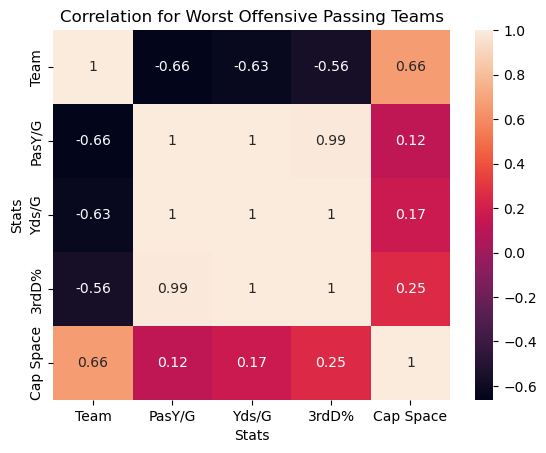

In [118]:
# Create various correlation matrices

import matplotlib.pyplot as plt
import seaborn as sns

corr_pass_matrix = corr_off_pass.corr(method='pearson', numeric_only=True)

sns.heatmap(corr_pass_matrix, annot=True)

plt.title('Correlation for Worst Offensive Passing Teams')
plt.xlabel('Stats')
plt.ylabel('Stats')
plt.show()

### From the correlation, I don't find anything too surprising. Considering these are the worst teams in this category, it's no shock to find a strong correlation between total yard gained, passing yards, and third down percentage. However, there does seem to be a considerable correlation between the Team and their Cap Space. Although that may not be as insightful considering the small sample of data. Especially since Cap Space has very little correlation to the passing statistics. I'm going to move on without correlating the other subsets as I expect them to tell me a similar story.

In [31]:
worst_def_front

,Team,RushYds/G,Sack,Pts/G,Type,Cap Space
0,Arizona,143.2,33,26.8,Defense,56632512
1,NY Giants,132.4,34,23.9,Defense,38288933
2,Washington,126.8,39,30.5,Defense,91542471
3,Carolina,122.4,27,24.5,Defense,11911547


In [88]:
sack_median = worst_def_front['Sack'].median()
rushyds_median = worst_def_front['RushYds/G'].median()

# Define a function to apply the condition check

def check_condition_front(row):

# Check if 'RushYds/G' is greater than the median or 'Sack' less than 30 and if 'Sack' is less than the median
    
    if (row['Sack'] < 30):
        return 'Line Help'
    elif ((row['RushYds/G'] > rushyds_median) and (row['Sack'] < sack_median)):
        return 'Line Help'
    else:
        return 'Target Linebacker'
    
worst_def_front['Assessment'] = worst_def_front.apply(check_condition_front, axis=1)

worst_def_front

,Team,RushYds/G,Sack,Pts/G,Type,Cap Space,Assessment
0,Arizona,143.2,33,26.8,Defense,56632512,Line Help
1,NY Giants,132.4,34,23.9,Defense,38288933,Target Linebacker
2,Washington,126.8,39,30.5,Defense,91542471,Target Linebacker
3,Carolina,122.4,27,24.5,Defense,11911547,Line Help


In [89]:
# Complete the same for other subsets
# Defense backfield

int_mean = worst_def_back['Int'].mean()


def check_condition_back(row):
    if row['Int'] < int_mean:
        return 'Cornerback'
    else:
        return 'Safety help'
    
worst_def_back['Assessment'] = worst_def_back.apply(check_condition_back, axis=1)

# Offensive rushing

rush_gain_yds_mean = worst_off_run['RusY/G'].mean()


def check_condition_run(row):
    if row['RusY/G'] < rush_gain_yds_mean:
        return 'Running Back'
    else:
        return 'Offensive Line'
    
worst_off_run['Assessment'] = worst_off_run.apply(check_condition_run, axis=1)


# Offensive passing

pass_gain_yds_mean = worst_off_pass['PasY/G'].mean()


def check_condition_pass(row):
    if (row['PasY/G'] < pass_gain_yds_mean):
        return 'Quarterback'
    else:
        return 'Skill Position'
    
worst_off_pass['Assessment'] = worst_off_pass.apply(check_condition_pass, axis=1)

In [35]:
worst_off_run

,Team,RusY/G,Yds/G,3rdD%,ToP/G,Type,Cap Space,Assessment
0,Las Vegas,90.7,289.5,35.6,28:34,Offense,41605109,Running Back
1,New England,95.7,276.2,30.2,28:03,Offense,85326475,Offensive Line
2,NY Jets,96.9,268.6,26.0,29:09,Offense,20705353,Offensive Line


### Create a new dataframe listing all Teams with the worst Offensive and Defensive stats, their needed positions, and salary cap space

In [90]:
all_dfs = [worst_off_run[['Team','Type','Cap Space','Assessment']], worst_off_pass[['Team','Type','Cap Space','Assessment']],
           worst_def_front[['Team','Type','Cap Space','Assessment']], worst_def_back[['Team','Type','Cap Space','Assessment']]]

target_free_agents = reduce(lambda left, right: pd.concat(all_dfs, ignore_index=True, axis=0), all_dfs)

target_free_agents.sort_values(by='Cap Space', ascending=False, inplace=True)

In [91]:
target_free_agents

,Team,Type,Cap Space,Assessment
8,Washington,Defense,91542471,Target Linebacker
10,Washington,Defense,91542471,Cornerback
1,New England,Offense,85326475,Offensive Line
4,New England,Offense,85326475,Quarterback
6,Arizona,Defense,56632512,Line Help
11,Philadelphia,Defense,42959107,Safety help
0,Las Vegas,Offense,41605109,Running Back
5,Las Vegas,Offense,41605109,Skill Position
7,NY Giants,Defense,38288933,Target Linebacker
2,NY Jets,Offense,20705353,Offensive Line


In [92]:
# add column to eventual target free agent desired

target_free_agents['Target'] = None
target_free_agents

,Team,Type,Cap Space,Assessment,Target
8,Washington,Defense,91542471,Target Linebacker,None
10,Washington,Defense,91542471,Cornerback,None
1,New England,Offense,85326475,Offensive Line,None
4,New England,Offense,85326475,Quarterback,None
6,Arizona,Defense,56632512,Line Help,None
11,Philadelphia,Defense,42959107,Safety help,None
0,Las Vegas,Offense,41605109,Running Back,None
5,Las Vegas,Offense,41605109,Skill Position,None
7,NY Giants,Defense,38288933,Target Linebacker,None
2,NY Jets,Offense,20705353,Offensive Line,None


In [93]:
# add column to avail_fa to set their availability before loop

avail_fa['Available'] = True

In [94]:
# Define a mapping from target position groups to the positions in the free agents DataFrame

position_group_mapping = {
    'Target Linebacker': ['LB'],
    'Cornerback': ['CB'],
    'Offensive Line': ['T', 'C', 'G'],
    'Quarterback': ['QB'],
    'Line Help': ['DI', 'ED'],
    'Safety help': ['S'],
    'Running Back': ['HB'],
    'Skill Position': ['WR', 'TE']
}


# Iterate through the rows of target_free_agents df

for index, row in target_free_agents.iterrows():
    # Get the target positions for the current team's target position group
    target_positions = position_group_mapping.get(row['Assessment'], [])
    
    # Find the first available free agent that matches one of the target positions
    available_free_agents = avail_fa[(avail_fa['Position'].isin(target_positions)) & (avail_fa['Available'])]
    
    if not available_free_agents.empty:
        # Select the first available free agent
        selected_free_agent = available_free_agents.iloc[0]
        
        # Assign the selected free agent to the team
        target_free_agents.at[index, 'Target'] = selected_free_agent['Player']
        
        # Mark the selected free agent as unavailable
        avail_fa.at[selected_free_agent.name, 'Available'] = False

target_free_agents

,Team,Type,Cap Space,Assessment,Target
8,Washington,Defense,91542471,Target Linebacker,Patrick Queen
10,Washington,Defense,91542471,Cornerback,Kendall Fuller
1,New England,Offense,85326475,Offensive Line,Tyron Smith
4,New England,Offense,85326475,Quarterback,Kirk Cousins
6,Arizona,Defense,56632512,Line Help,Chris Jones
11,Philadelphia,Defense,42959107,Safety help,Kamren Curl
0,Las Vegas,Offense,41605109,Running Back,Saquon Barkley
5,Las Vegas,Offense,41605109,Skill Position,Mike Evans
7,NY Giants,Defense,38288933,Target Linebacker,Frankie Luvu
2,NY Jets,Offense,20705353,Offensive Line,Trent Brown
